# Level 3 - Task 1

# Task: Predictive Modeling

In [3]:
# Importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
data_set = pd.read_csv(r"D:\Cognifyz Internship\Cognifyz Internship Dataset.csv")

# Print dataset
data_set.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
data_set.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
# Handle missing values
data_set["Cuisines"] = data_set["Cuisines"].fillna("Unknown")
data_set.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
# Build a regression model to predict the aggregate rating of a restaurant based on available features. 
# Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Convert categorical variables to numeric(one-hot encoding)
encoded_dataset = pd.get_dummies(data_set, columns = ["Has Table booking", "Has Online delivery"], drop_first=True)
print(encoded_dataset.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [12]:
# Select features and target variable
X = encoded_dataset[["Average Cost for two", "Price range", "Votes", "Has Table booking_Yes", "Has Online delivery_Yes"]]
y = encoded_dataset["Aggregate rating"]

In [13]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
# Train a Random Forest model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Make predictions
y_pred = model.predict(X_test)

In [16]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model: Random Forest Regression\n")
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE) :", rmse)
print("R² Score :", r2)

Model: Random Forest Regression

Mean Squared Error (MSE):  1.6764802747031453
Root Mean Squared Error (RMSE) : 1.2947896642710526
R² Score : 0.26344464090219444


In [17]:
# Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

In [18]:
# Import models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [19]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state = 42),
    "Random Forest": RandomForestRegressor(random_state = 42)
}

In [20]:
# Create Dictionary to store results
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "RMSE": rmse, "R2 Score": r2}

# Display results
results = pd.DataFrame(results)
print(results)

          Linear Regression  Decision Tree  Random Forest
MSE                1.676480       0.203498       0.134012
RMSE               1.294790       0.451107       0.366076
R2 Score           0.263445       0.910594       0.941122


~ Conclusion:

Linear Regression is NOT suitable for this dataset.

Decision Tree is decent but could overfit.

Random Forest is the best choice, as it achieves the highest accuracy and lowest error.

# Level 3 - Task 2

# Task: Customer Preference Analysis

In [27]:
# Analyze the relationship between the type of cuisine and the restaurant's rating.

In [28]:
cuisines = data_set["Cuisines"]
cuisines.value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

In [29]:
# Filter top 10 cuisines based on their frequency
top10_cuisines = data_set['Cuisines'].value_counts().head(10).index

# Filter data for these top 10 cuisines
filtered_data = data_set[data_set['Cuisines'].isin(top10_cuisines)]

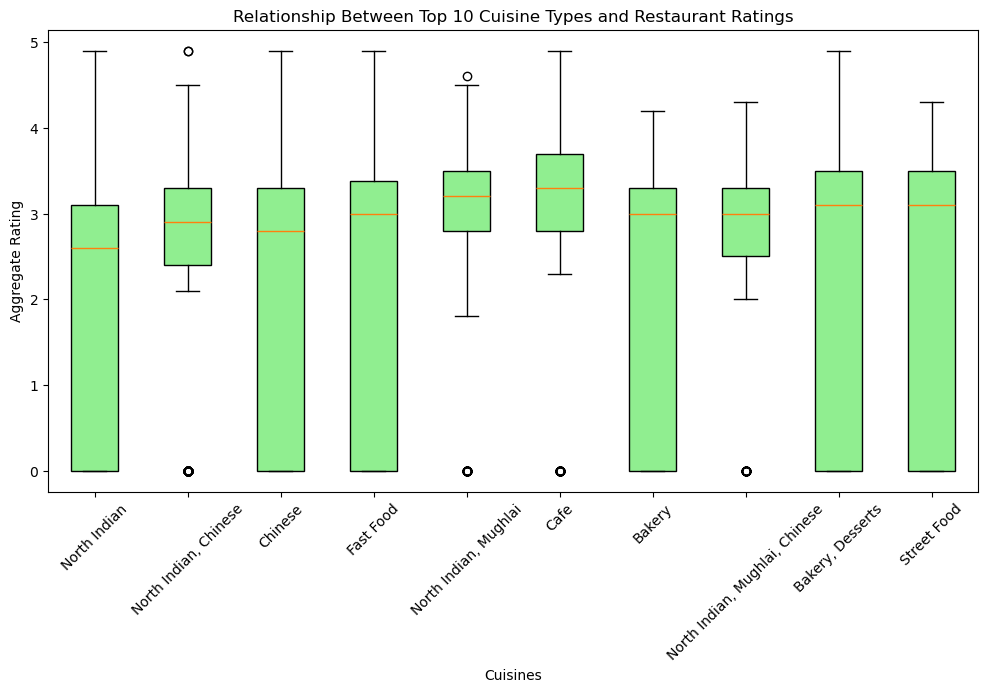

In [30]:
# Group ratings by each cuisine
boxplot_data = [filtered_data[filtered_data['Cuisines'] == cuisine]['Aggregate rating'] for cuisine in top10_cuisines]

# Plot the boxplot
plt.figure(figsize = (12, 6))
plt.boxplot(boxplot_data, patch_artist = True, boxprops = dict(facecolor = 'lightgreen'))

# Add labels and title
plt.title("Relationship Between Top 10 Cuisine Types and Restaurant Ratings")
plt.xlabel("Cuisines")
plt.ylabel("Aggregate Rating")
plt.xticks(ticks = range(1, len(top10_cuisines) + 1), labels = top10_cuisines, rotation = 45)  
plt.show()

In [31]:
# Identify the most popular cuisines among  customers based on the number of votes.

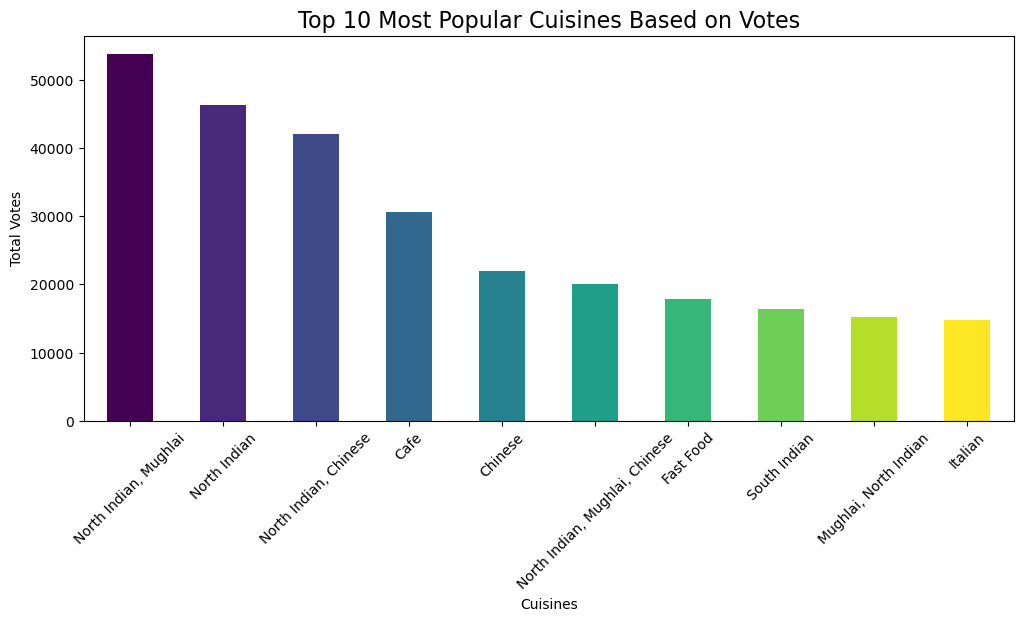

In [32]:
# Group data by Cuisines and summing up the Votes
popular_cuisines = data_set.groupby("Cuisines")["Votes"].sum().sort_values(ascending = False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 5))
popular_cuisines.plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
plt.title("Top 10 Most Popular Cuisines Based on Votes", fontsize = 16)
plt.xlabel("Cuisines")
plt.ylabel("Total Votes")
plt.xticks(rotation = 45)
plt.show()

In [33]:
# Determine if there are any specific cuisines that tend to receive higher ratings.

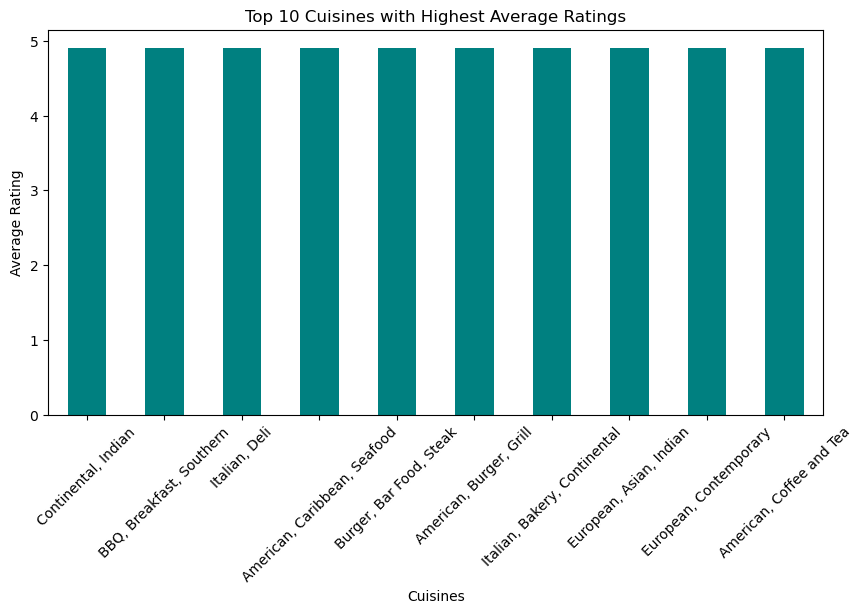

In [34]:
import matplotlib.pyplot as plt

# Calculate average rating for each cuisine
top10_cuisines = data_set.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending = False).head(10)

# Plotting
top10_cuisines.plot(kind = 'bar', color = 'teal', figsize = (10, 5))
plt.title("Top 10 Cuisines with Highest Average Ratings")
plt.xlabel("Cuisines")
plt.ylabel("Average Rating")
plt.xticks(rotation = 45)
plt.show()

# Level 3 - Task 3

# Task: Data Visualization

In [37]:
# Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

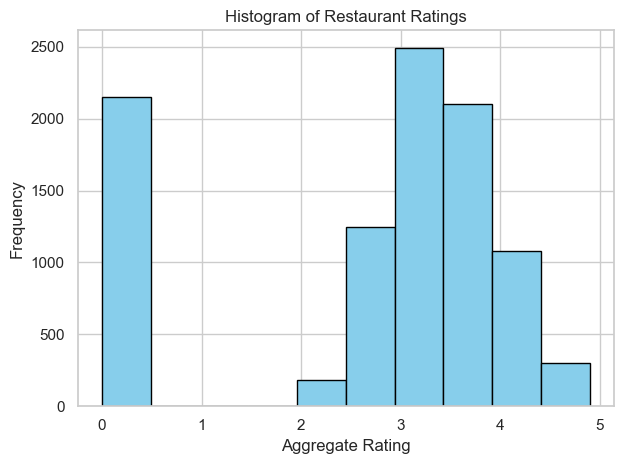

In [38]:
# Set the style
sns.set(style = "whitegrid")

# Histogram
plt.hist(data_set['Aggregate rating'], bins = 10, color = 'skyblue', edgecolor = 'black')
plt.title('Histogram of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

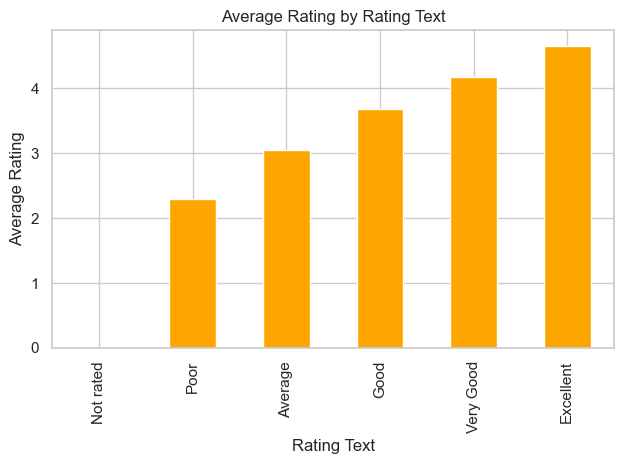

In [39]:
# Bar Plot
avg_rating = data_set.groupby('Rating text')['Aggregate rating'].mean().sort_values()
avg_rating.plot(kind = 'bar', color = 'orange')
plt.title('Average Rating by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Average Rating')

# Adjust layout
plt.tight_layout()
plt.show()

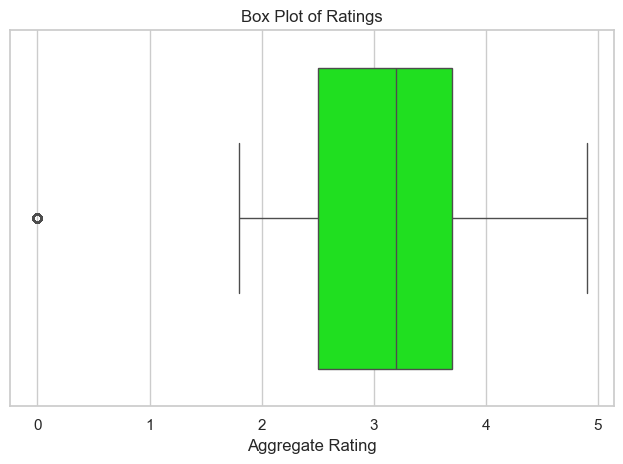

In [40]:
# Box Plot
sns.boxplot(x = data_set['Aggregate rating'], color = 'lime')
plt.title('Box Plot of Ratings')
plt.xlabel('Aggregate Rating')

# Adjust layout
plt.tight_layout()
plt.show()

In [41]:
# Compare the average ratings of different cuisines or cities using appropriate visualizations.

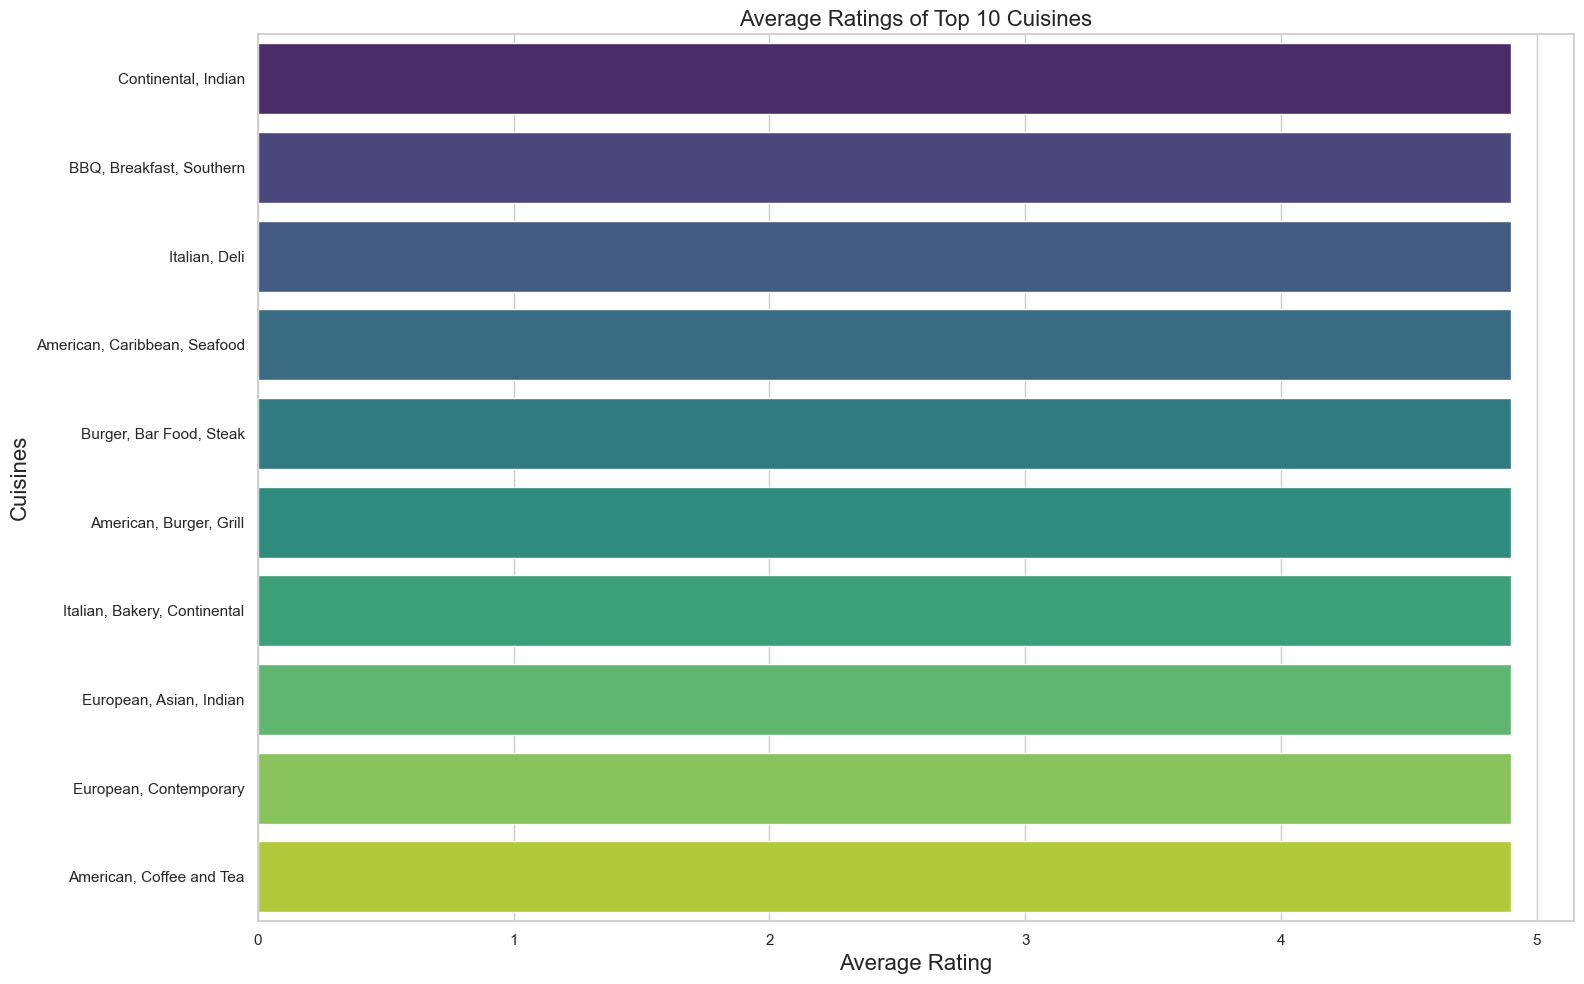

In [42]:
# Set style
sns.set(style = "whitegrid")

# Average Ratings by Top 10 Cuisines
plt.figure(figsize=(16, 10))
top10_cuisines = data_set.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending = False).head(10)
sns.barplot(x = top10_cuisines.values, y = top10_cuisines.index, palette = 'viridis')
plt.title('Average Ratings of Top 10 Cuisines', fontsize = 16)
plt.xlabel('Average Rating', fontsize = 16)
plt.ylabel('Cuisines', fontsize = 16)

# Adjust layout
plt.tight_layout()
plt.show()

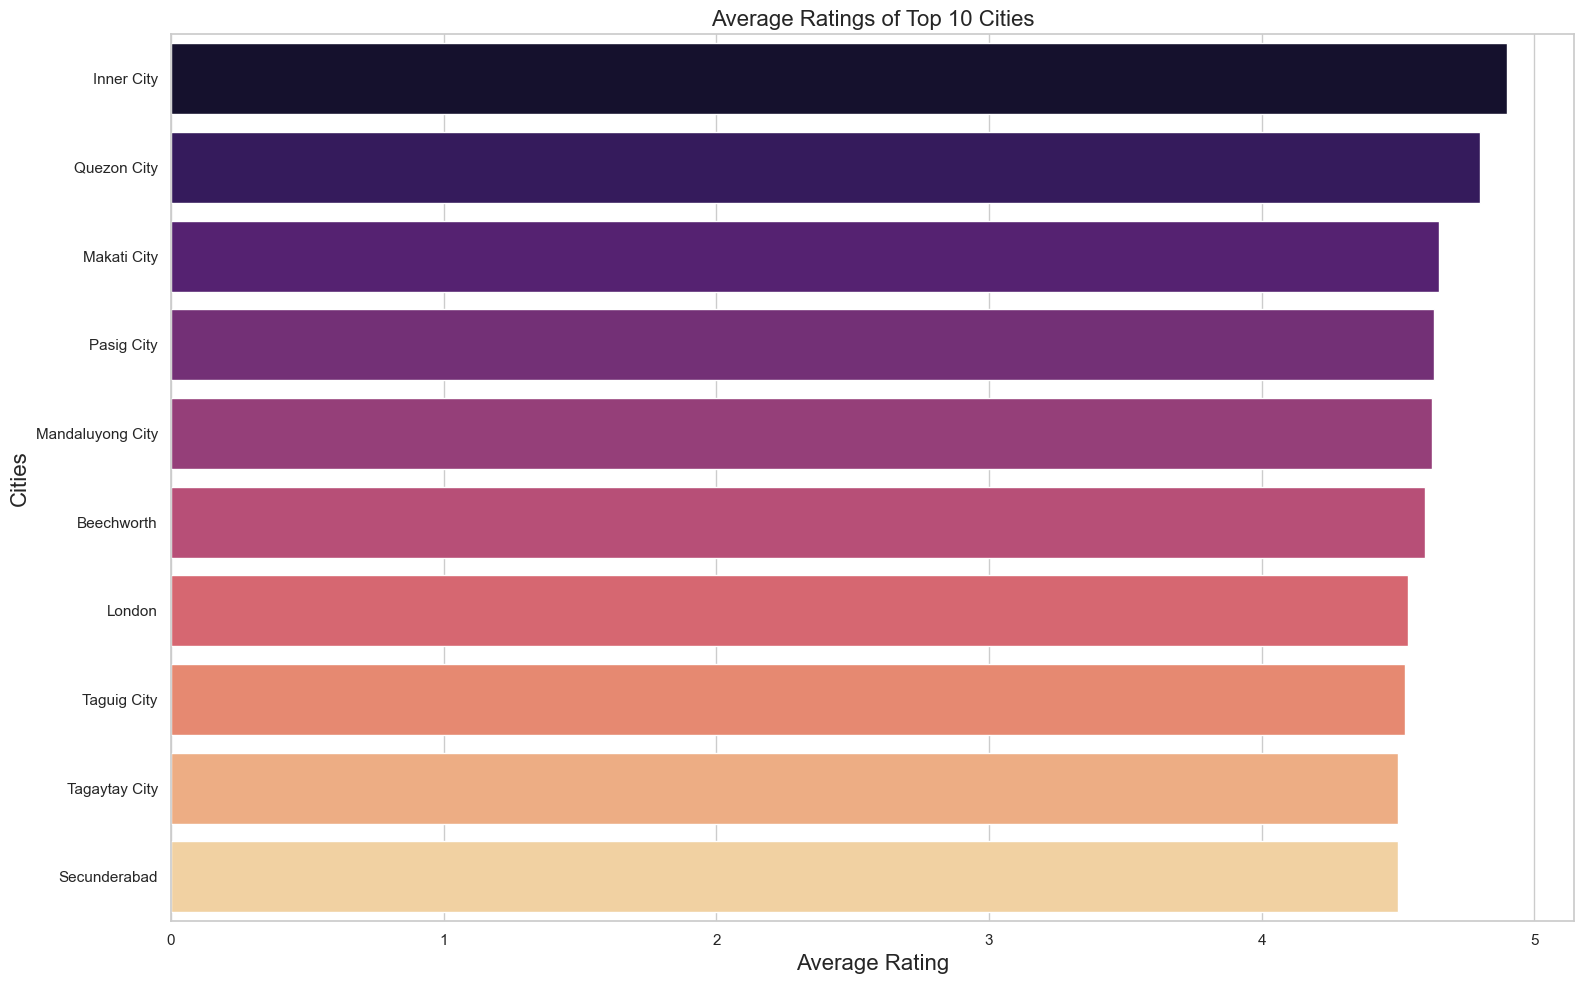

In [43]:
# Average Ratings by Top 10 Cities
plt.figure(figsize = (16, 10))
top10_cities = data_set.groupby('City')['Aggregate rating'].mean().sort_values(ascending = False).head(10)
sns.barplot(x = top10_cities.values, y = top10_cities.index, palette = 'magma')
plt.title('Average Ratings of Top 10 Cities', fontsize = 16)
plt.xlabel('Average Rating', fontsize = 16)
plt.ylabel('Cities', fontsize = 16)

# Adjust layout
plt.tight_layout()
plt.show()

In [44]:
# Visualize the relationship between various features and the target variable to gain insights.

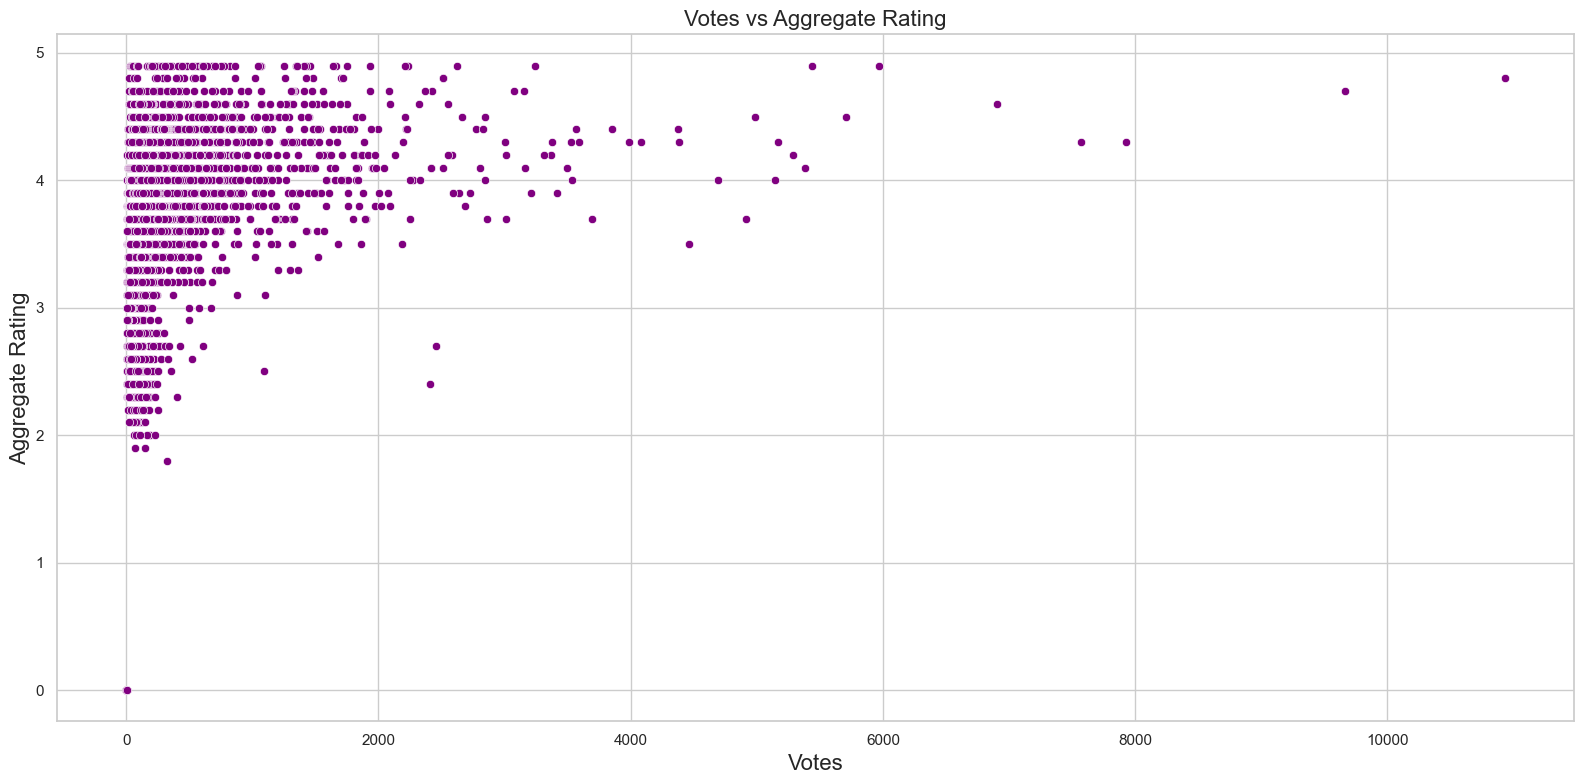

In [45]:
# Set style
sns.set(style = "whitegrid")

# Scatter Plot
plt.figure(figsize = (16, 8))
sns.scatterplot(x='Votes', y='Aggregate rating', data=data_set, color='purple')
plt.title('Votes vs Aggregate Rating', fontsize = 16)
plt.xlabel('Votes', fontsize = 16)
plt.ylabel('Aggregate Rating', fontsize = 16)

# Adjust layout
plt.tight_layout()
plt.show()

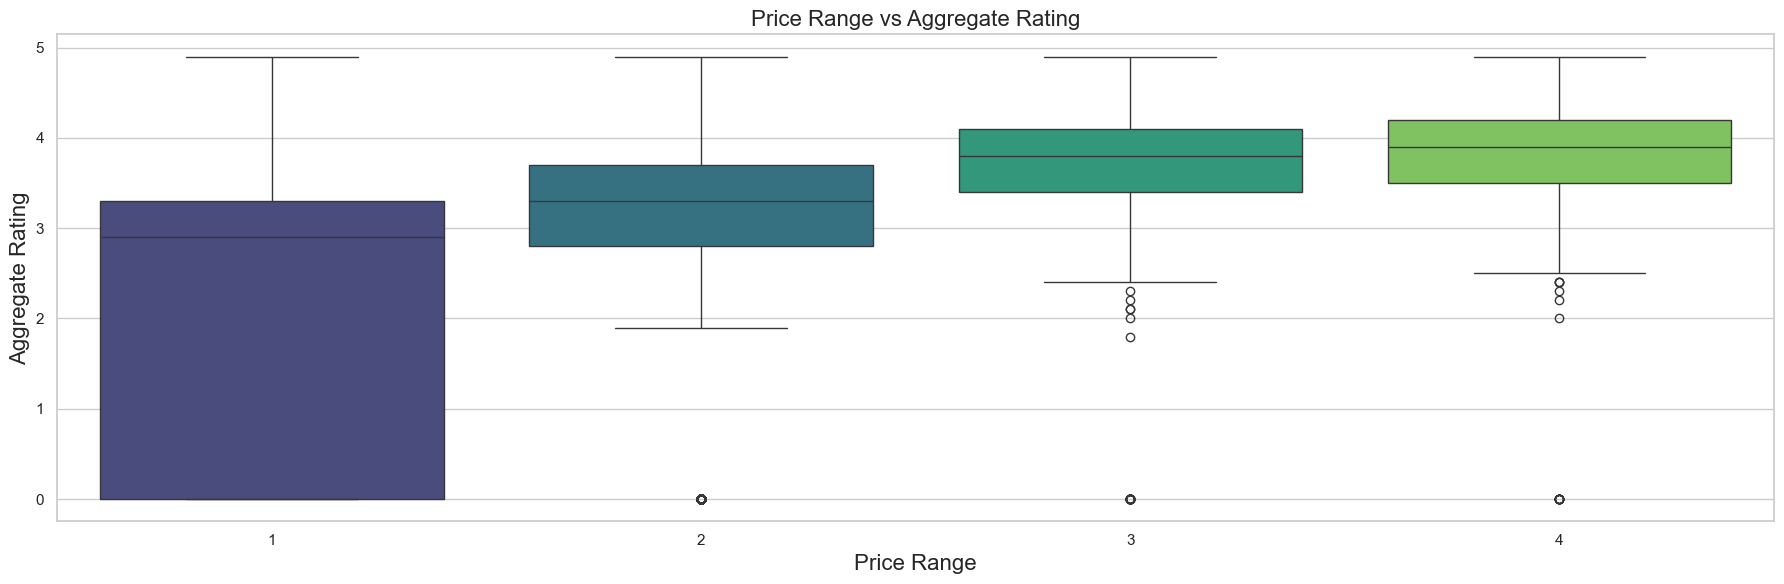

In [46]:
# Box Plot
plt.figure(figsize = (18, 6))
sns.boxplot(x = 'Price range', y = 'Aggregate rating', data = data_set, palette = 'viridis')
plt.title('Price Range vs Aggregate Rating',fontsize = 16)
plt.xlabel('Price Range',fontsize = 16)
plt.ylabel('Aggregate Rating',fontsize = 16)

# Adjust layout
plt.tight_layout()
plt.show()

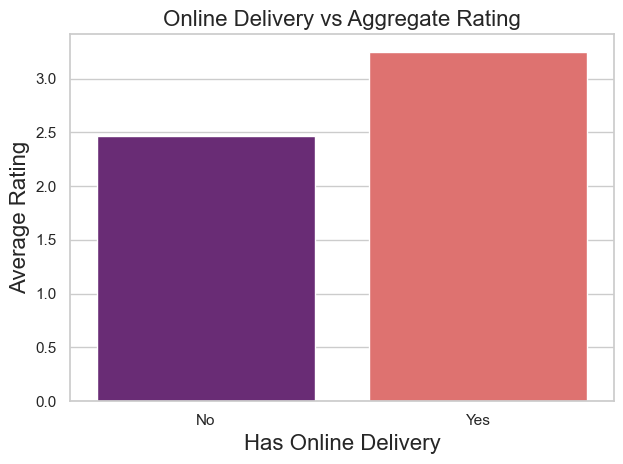

In [51]:
# Bar Plot
# plt.figure(figsize = (10, 5))
online_delivery = data_set.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()
sns.barplot(x = 'Has Online delivery', y = 'Aggregate rating', data = online_delivery, palette = 'magma')
plt.title('Online Delivery vs Aggregate Rating',fontsize = 16)
plt.xlabel('Has Online Delivery',fontsize = 16)
plt.ylabel('Average Rating',fontsize = 16)

# Adjust layout
plt.tight_layout()
plt.show()